<a href="https://colab.research.google.com/github/Lizmare/Trabajos_python/blob/main/Copia_de_EDA_16_WEB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA_WEB

* Realizar un analisis EDA sobre las visitas, clicks y el tiempo  pagina web y su rentabilidad por de los años 2021 y 2022.
* Revisar como van los ingresos y rentabilidad del 2023.

#Parte 1 Analisis de vistas (web1)

* 1.Importar los datos (web1)
* 2.Cambiar las columnas
    * dia -> Fecha
    * Visitas de la Págia -> visita_pagina
    * Tiempo promedio en la página (segundos) -> tiempo_seg
* 3.Crear una columna para año y mes
* 4.Verificar si hay nulos
* 5.Crear en un DataFrame nuevo solo 2021 y 2022
* 6.Revisar con un histograma las variables visita_pagina,tiempo_seg y Clicks
* 7.Realizar un ScatterPlot de visita_pagina VS tiempo_seg

In [ ]:
#Conexion con drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importar las bibliotecas necesarias:
import pandas as pd #importamos la libreria pandas
import numpy as np # importamos la libreria numpy
import matplotlib as mpl #se llama a la libreria matplotlib
import matplotlib.pyplot as plt #se llama a la sub-libreria pyplot d matplotlib
import seaborn as sns #se llama a la libreria seaborn

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/clases phyton/clase 8 python/Copia de web_1.xlsx")
df.head(5)

,dia,Visitas de la Página,Tiempo promedio en la página (segundos),Clicks
0,2018-01-01,3328,71,13
1,2018-02-01,3097,56,7
2,2018-03-01,3202,79,5
3,2018-04-01,3170,81,3
4,2018-05-01,2366,50,3


2.Cambiar las columnas
dia -> Fecha
Visitas de la Págia -> visita_pagina
Tiempo promedio en la página (segundos) -> tiempo_seg

In [ ]:
#informacion detallada del data st
df.info ()
#Cantidad de tipos de variables que tenemos
df.dtypes.value_counts()
#La cantidad de filas y columnas del dataframe
print(f" Filas: {df.shape[0]}, Columnas:  {df.shape[1]} ")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   dia                                      66 non-null     datetime64[ns]
 1   Visitas de la Página                     66 non-null     int64         
 2   Tiempo promedio en la página (segundos)  66 non-null     int64         
 3   Clicks                                   66 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.2 KB
 Filas: 66, Columnas:  4 


In [ ]:
mapeo={'dia':'Fecha',
       'Visitas de la Página':'visita_pagina',
       'Tiempo promedio en la página (segundos)':'tiempo_seg'}
df.rename(columns=mapeo,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          66 non-null     datetime64[ns]
 1   visita_pagina  66 non-null     int64         
 2   tiempo_seg     66 non-null     int64         
 3   Clicks         66 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.2 KB


In [ ]:
#3.Crear una columna para año
df['Mes']=df['Fecha'].dt.month
df['Año']=df['Fecha'].dt.year
df.head(5)

,Fecha,visita_pagina,tiempo_seg,Clicks,Mes,Año
0,2018-01-01,3328,71,13,1,2018
1,2018-02-01,3097,56,7,2,2018
2,2018-03-01,3202,79,5,3,2018
3,2018-04-01,3170,81,3,4,2018
4,2018-05-01,2366,50,3,5,2018


In [ ]:
#4.Verificar si hay nulos
#Vemos si hay nulos
print(df.isnull())
#Cuantificamos cuantos nulos existe por columna
total = df.isnull().sum().sort_values(ascending=False)
print(total )
#Cuantificamos cuantos nulos existe en todo el data frame
print( 'Total de nulos en todo el dataframe: ',df.isnull().sum().sum())

    Fecha  visita_pagina  tiempo_seg  Clicks    Mes    Año
0   False          False       False   False  False  False
1   False          False       False   False  False  False
2   False          False       False   False  False  False
3   False          False       False   False  False  False
4   False          False       False   False  False  False
..    ...            ...         ...     ...    ...    ...
61  False          False       False   False  False  False
62  False          False       False   False  False  False
63  False          False       False   False  False  False
64  False          False       False   False  False  False
65  False          False       False   False  False  False

[66 rows x 6 columns]
Fecha            0
visita_pagina    0
tiempo_seg       0
Clicks           0
Mes              0
Año              0
dtype: int64
Total de nulos en todo el dataframe:  0


In [ ]:
#5.Crear en un DataFrame nuevo solo 2021 y 2022
df_filter=df[df['Año'].isin([2021,2022])]
df_filter

,Fecha,visita_pagina,tiempo_seg,Clicks,Mes,Año
36,2021-01-01,2376,68,5,1,2021
37,2021-02-01,3814,38,7,2,2021
38,2021-03-01,3303,42,7,3,2021
39,2021-04-01,3836,40,11,4,2021
40,2021-05-01,5291,28,9,5,2021
41,2021-06-01,3729,31,4,6,2021
42,2021-07-01,4510,35,8,7,2021
43,2021-08-01,3037,52,6,8,2021
44,2021-09-01,2881,37,7,9,2021
45,2021-10-01,2313,63,5,10,2021


<Axes: xlabel='visita_pagina', ylabel='Count'>

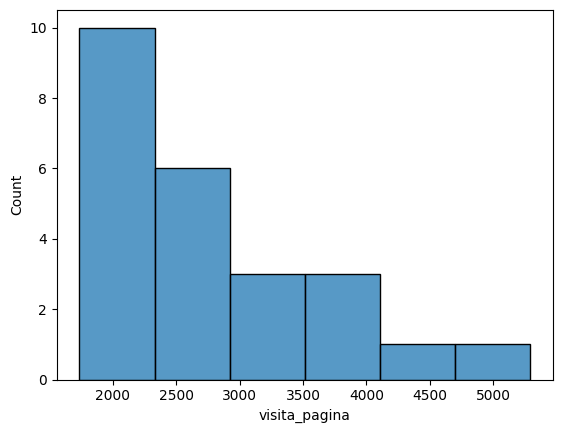

In [ ]:
#6.Revisar con un histograma las variables visita_pagina,tiempo_seg y Clicks
sns.histplot(data=df_filter['visita_pagina'])

<Axes: xlabel='tiempo_seg', ylabel='Count'>

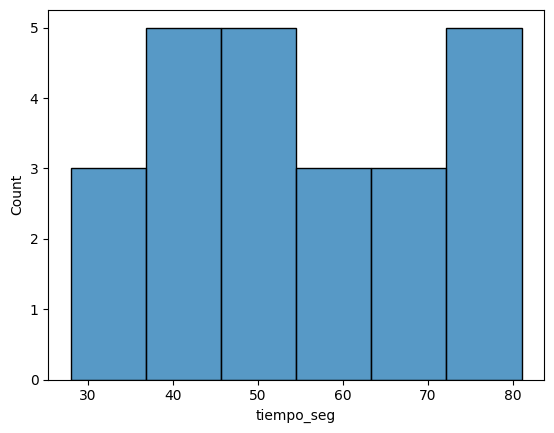

In [ ]:
sns.histplot(data=df_filter['tiempo_seg'])

<Axes: xlabel='Clicks', ylabel='Count'>

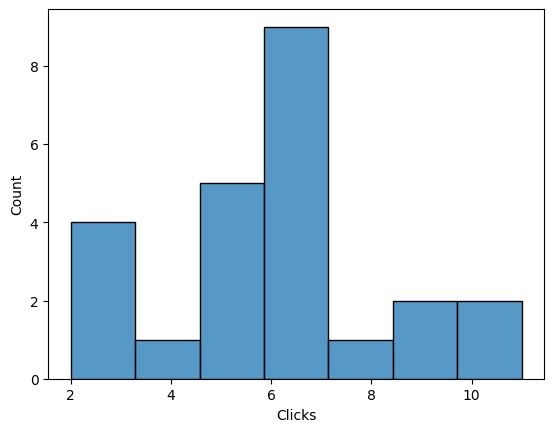

In [ ]:
sns.histplot(data=df_filter['Clicks'])

<Axes: xlabel='visita_pagina', ylabel='tiempo_seg'>

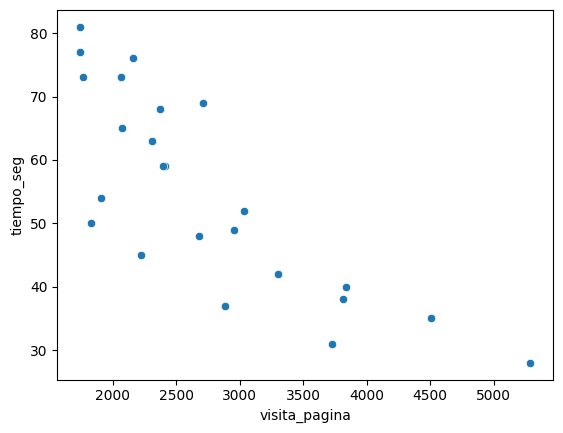

In [ ]:
from seaborn.relational import scatterplot
#7.Realizar un ScatterPlot de visita_pagina VS tiempo_seg
sns.scatterplot(data=df_filter,x='visita_pagina',y='tiempo_seg')

# Parte 2: Analisis de Margenes (web2)

* 1.Importar los datos (web2)
* 2.Calcular el Margen y Rentabilidad
    * Margen -> Ingreso - Gasto
    * Rentabilidad -> Margen/Gasto
    
* 3.Crear una columna para año y mes (similar al anterior).
* 4.Ingresar en un dataFrame solo los años 2021 y 2022 y visualisar agrupado los margenes y rentabilidad por año.
* 4.Hacerlo mismo que 3 pero solo para 2023


In [ ]:
df2 = pd.read_excel("/content/drive/MyDrive/clases phyton/clase 8 python/Copia de web_2.xlsx")
df2.head(5)

,dia,Ingresos,Gasto,Margen,Rentabilidad
0,2018-01-01,480728.006,362044.206,NaN,NaN
1,2018-02-01,641155.476,371550.776,NaN,NaN
2,2018-03-01,890076.650,614858.550,NaN,NaN
3,2018-04-01,552673.978,348520.978,NaN,NaN
4,2018-05-01,750776.984,494685.584,NaN,NaN


In [ ]:
#informacion detallada del data st
df2.info ()
#Cantidad de tipos de variables que tenemos
df2.dtypes.value_counts()
#La cantidad de filas y columnas del dataframe
print(f" Filas: {df.shape[0]}, Columnas:  {df.shape[1]} ")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dia           66 non-null     datetime64[ns]
 1   Ingresos      66 non-null     float64       
 2   Gasto         66 non-null     float64       
 3   Margen        0 non-null      float64       
 4   Rentabilidad  0 non-null      float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.7 KB
 Filas: 66, Columnas:  5 


In [ ]:
df2.isnull().sum()

dia              0
Ingresos         0
Gasto            0
Margen          66
Rentabilidad    66
dtype: int64

In [ ]:
df.head(10)

,dia,Ingresos,Gasto,Margen,Rentabilidad
0,2018-01-01,480728.006,362044.206,NaN,NaN
1,2018-02-01,641155.476,371550.776,NaN,NaN
2,2018-03-01,890076.650,614858.550,NaN,NaN
3,2018-04-01,552673.978,348520.978,NaN,NaN
4,2018-05-01,750776.984,494685.584,NaN,NaN
5,2018-06-01,553054.693,374920.193,NaN,NaN
6,2018-07-01,274567.612,211987.212,NaN,NaN
7,2018-08-01,619284.636,370826.236,NaN,NaN
8,2018-09-01,674484.588,435986.488,NaN,NaN
9,2018-10-01,762559.123,532321.323,NaN,NaN


In [ ]:
df2['Margen']=df2['Ingresos']- df2['Gasto']

In [ ]:
df2.head(5)

,dia,Ingresos,Gasto,Margen,Rentabilidad
0,2018-01-01,480728.006,362044.206,118683.8,NaN
1,2018-02-01,641155.476,371550.776,269604.7,NaN
2,2018-03-01,890076.650,614858.550,275218.1,NaN
3,2018-04-01,552673.978,348520.978,204153.0,NaN
4,2018-05-01,750776.984,494685.584,256091.4,NaN


In [ ]:
df2['Rentabilidad']=df2['Margen']/df2['Gasto']
df2.head(5)

,dia,Ingresos,Gasto,Margen,Rentabilidad
0,2018-01-01,480728.006,362044.206,118683.8,0.327816
1,2018-02-01,641155.476,371550.776,269604.7,0.725620
2,2018-03-01,890076.650,614858.550,275218.1,0.447612
3,2018-04-01,552673.978,348520.978,204153.0,0.585770
4,2018-05-01,750776.984,494685.584,256091.4,0.517685


In [ ]:
#3.Crear una columna para año y mes (similar al anterior).
df2['Mes']=df2['dia'].dt.month
df2['Año']=df2['dia'].dt.year
df2.head(5)

,dia,Ingresos,Gasto,Margen,Rentabilidad,Mes,Año
0,2018-01-01,480728.006,362044.206,118683.8,0.327816,1,2018
1,2018-02-01,641155.476,371550.776,269604.7,0.725620,2,2018
2,2018-03-01,890076.650,614858.550,275218.1,0.447612,3,2018
3,2018-04-01,552673.978,348520.978,204153.0,0.585770,4,2018
4,2018-05-01,750776.984,494685.584,256091.4,0.517685,5,2018


In [ ]:
#4.Ingresar en un dataFrame solo los años 2021 y 2022 y visualisar agrupado los margenes y rentabilidad por año.
df2_filter=df2[df2['Año'].isin([2021,2022])]
df2_filter

,dia,Ingresos,Gasto,Margen,Rentabilidad,Mes,Año
36,2021-01-01,516269.923,322804.823,193465.1,0.599325,1,2021
37,2021-02-01,297812.749,208010.249,89802.5,0.431722,2,2021
38,2021-03-01,692677.087,508308.687,184368.4,0.362710,3,2021
39,2021-04-01,897163.712,630687.012,266476.7,0.422518,4,2021
40,2021-05-01,417727.332,305892.832,111834.5,0.365600,5,2021
41,2021-06-01,326968.752,204281.452,122687.3,0.600580,6,2021
42,2021-07-01,326482.161,212153.761,114328.4,0.538894,7,2021
43,2021-08-01,508026.895,348082.395,159944.5,0.459502,8,2021
44,2021-09-01,413937.080,270683.180,143253.9,0.529231,9,2021
45,2021-10-01,422487.910,340646.510,81841.4,0.240253,10,2021


<ipython-input-57-86bf11a2e132>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df2_filter,x='Año', y='Margen',ci=None)


<Axes: xlabel='Año', ylabel='Margen'>

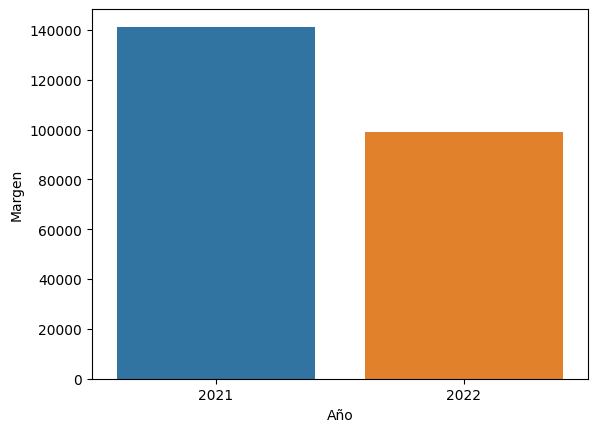

In [ ]:
sns.barplot(data=df2_filter,x='Año', y='Margen',ci=None)

<ipython-input-58-1da19deecc59>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df2_filter,x='Año', y='Rentabilidad',ci=None)


<Axes: xlabel='Año', ylabel='Rentabilidad'>

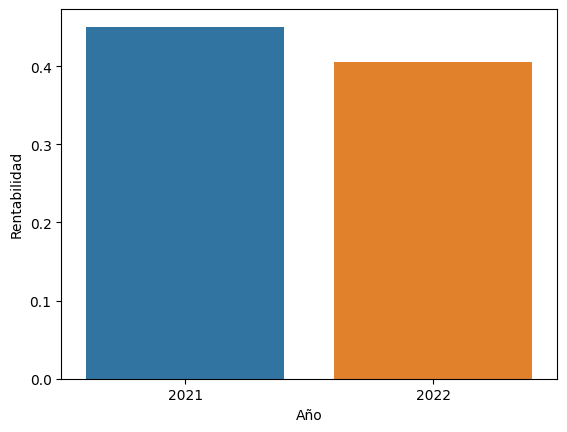

In [ ]:
sns.barplot(data=df2_filter,x='Año', y='Rentabilidad',ci=None)

In [ ]:
df3_filter=df2[df2['Año'].isin([2023])]

df3_filter

,dia,Ingresos,Gasto,Margen,Rentabilidad,Mes,Año
60,2023-01-01,360032.596,238676.396,121356.2,0.508455,1,2023
61,2023-02-01,573918.453,386219.753,187698.7,0.485989,2,2023
62,2023-03-01,397550.100,272909.500,124640.6,0.456710,3,2023
63,2023-04-01,282044.858,206488.358,75556.5,0.365912,4,2023
64,2023-05-01,310116.006,227344.706,82771.3,0.364078,5,2023
65,2023-06-01,615950.171,409508.971,206441.2,0.504119,6,2023


#PARTE 3: Conclusiones